In [15]:
import numpy as np
import matplotlib.pyplot as plt
from subpix_signals import subpix_signals
import gpu_tracking
import trackpy as tp
import os
from pathlib import Path

def load_dump(path):
    type_key = {0: "float32", 1: "uint32", 2: "int32"}
    for curdir, folders, files in os.walk(path):
        dumps = [file for file in files if file.startswith("dump")]
        inds = [int(dump.split(".")[0].replace("dump", "")) for dump in dumps]
        dumps_inds = list(zip(dumps, inds))
        dumps_inds.sort(key = lambda x: x[1])
        datas = []
        for dump, ind in dumps_inds:
            with open(Path(curdir) / f"shape{ind}.dump", "rb") as file:
                shape_type = np.frombuffer(file.read(), dtype = "uint32")
                shape, type = shape_type[:-1], shape_type[-1]
            
            with open(Path(curdir) / dump, "rb") as file:
                data = np.frombuffer(file.read(), dtype = type_key[type])
            datas.append(data.reshape(shape))
        return datas

shape = np.array([200, 200])
n_parts = 20
# pic = np.random.normal(size = shape, dtype = "float32")
pic = np.zeros(shape, dtype = "float32")
parts = np.random.uniform(size = (n_parts, 2))
parts = parts*(shape - 1).reshape(-1, 2)
# intensities = np.random.exponential(30, size = parts.shape[0]) + 20
intensities = 100
# plt.imshow(subpix_signals(parts, sigmas = 2, picture = pic, intensities = intensities))
# plt.plot(parts[:, 1], parts[:, 0], "k,")


In [23]:
arr = load_dump("../mean_pic")[0]

In [25]:
arr.sum()

276516830.0

In [19]:
load_dump("../mean_pic")[0].shape

(2, 512, 512)

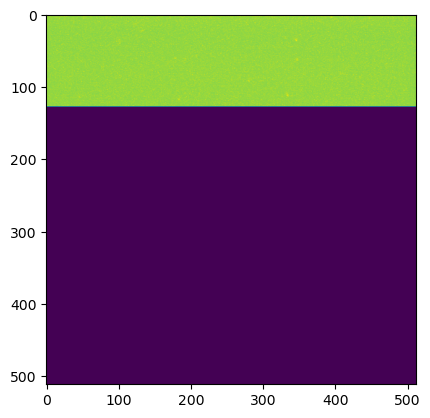

In [22]:
plt.imshow(load_dump("../mean_pic")[0][0])

In [7]:
load_dump("../mean_pic")

[array([90.36518], dtype=float32)]

17


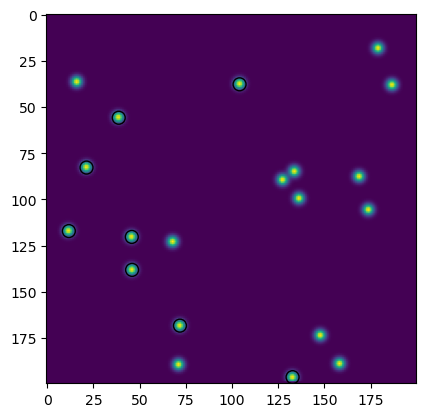

In [120]:
gpu_tracking.annotate_video(vid, df, r = d / 2, frame = 1)
print(len(df))

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

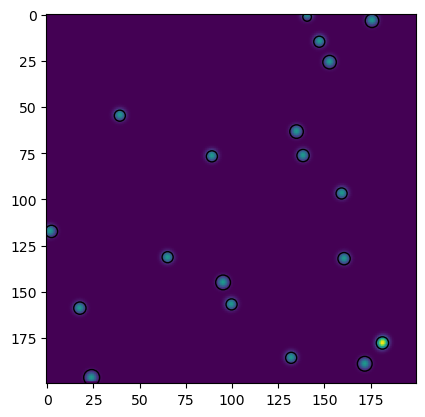

In [3]:
gpu_tracking.annotate_image(pic, gpu_tracking.LoG(pic[None, ...], min_r = 2, max_r = 5, minmass = 0, overlap_threshold = 0))

(array([72., 35., 15., 12.,  8.,  2.,  3.,  0.,  2.,  1.]),
 array([ 20.3460973 ,  39.84180089,  59.33750449,  78.83320808,
         98.32891168, 117.82461527, 137.32031887, 156.81602246,
        176.31172606, 195.80742965, 215.30313325]),
 <BarContainer object of 10 artists>)

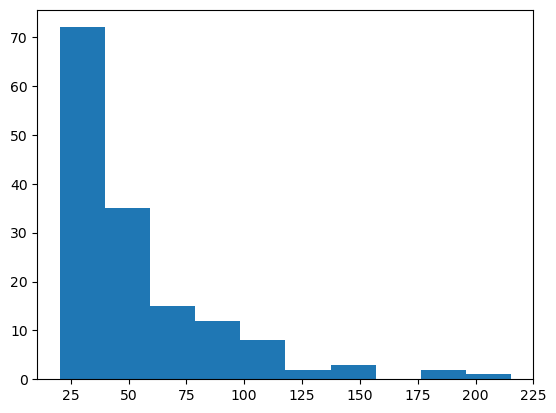

In [43]:
intensities = np.random.exponential(30, size = parts.shape[0]) + 20
plt.hist(intensities)

In [ ]:
d = 7
df = tp.locate(pic[None, ...], d)
df["frame"] = 0
gpu_tracking.annotate_image(pic, df, r = d / 2)